$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Nonlinear Logistic Regression Using Neural Networks

## Motivation and Setup

Linear function approximator as a neural network.

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/nnlinear.png">

What must we add to do logistic regression?

Just add the softmax calculation to the output layer. 

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/nnlinearlogisticregression.png">

Any thoughts on how to do nonlinear logistic regression?

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/nntwolayerlogisticregression.png">


## Derivation

We will maximize the log likelihood of the training data.
$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^K \eby{m}}; \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$



## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our previous neural network lectures.  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

## Two-Dimensional Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


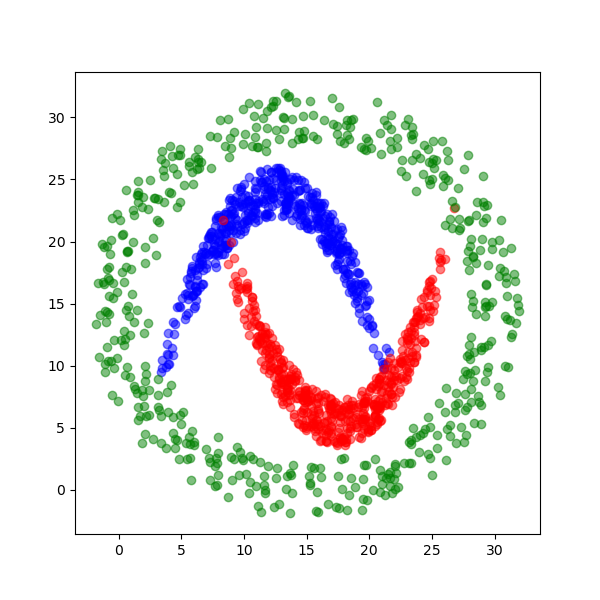

In [3]:
n = 500
x1 = np.linspace(5, 20, n) + np.random.uniform(-2, 2, n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2, 2, n)
x2 = np.linspace(10, 25, n) + np.random.uniform(-2, 2, n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2, 2, n)
angles = np.linspace(0, 2*np.pi, n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
X =  np.vstack((np.hstack((x1, x2, x3)),  np.hstack((y1, y2, y3)))).T
T = np.repeat(range(1, 4), n).reshape((-1, 1))
colors = ['blue', 'red', 'green']
plt.figure(figsize=(6, 6))
for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.

In Python, do this by defining a new class `NeuralNetworkClassifier`. It is easy to create a new class for using a neural network
as a classifier by making a subclass `NeuralNetworkClassifier` of the
`NeuralNetwork` and make the required changes.  The changes will be in `error_f`, `gradient_f`, `train`, and `use` functions.  <font color='red'>This is the topic of A3 !!  Once you have completed that, you will be able to run the remaining examples in this notebook.</font>

Let's import your `neuralnetworks.py` from your solution to A3.

In [23]:
import neuralnetworks as nn

SCG: Epoch 500 ObjectiveF=0.99128
SCG: Epoch 1000 ObjectiveF=0.99373
SCG: Epoch 1500 ObjectiveF=0.99448
SCG: Epoch 2000 ObjectiveF=0.99448
SCG: Epoch 2500 ObjectiveF=0.99448
SCG: Epoch 3000 ObjectiveF=0.99448
SCG: Epoch 3500 ObjectiveF=0.99448
SCG: Epoch 4000 ObjectiveF=0.99448
SCG: Epoch 4500 ObjectiveF=0.99448
SCG: Epoch 5000 ObjectiveF=0.99448


<IPython.core.display.Javascript object>


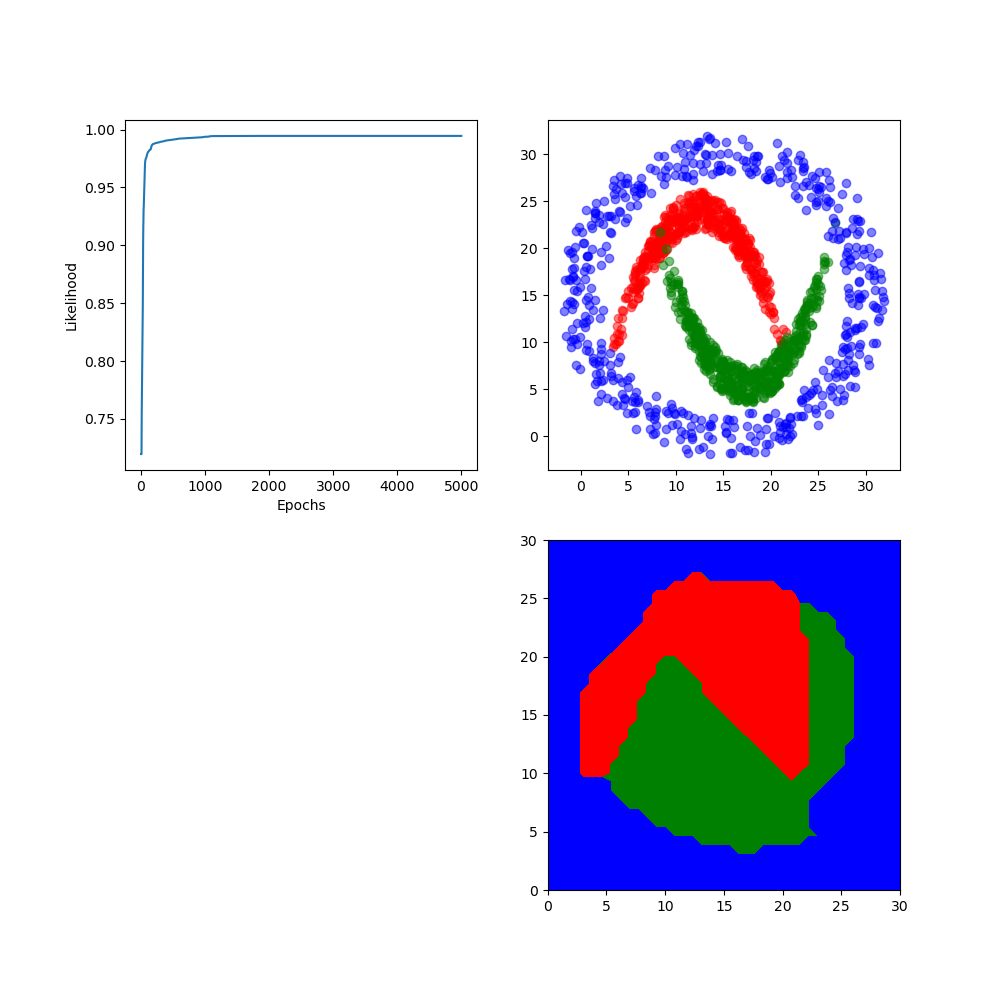

In [31]:
import neuralnetworks as nn
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

nHidden = [5]
nnet = nn.NeuralNetworkClassifier(2, nHidden, 3) # 3 classes, will actually make 2-unit output layer
nnet.train(X, T, n_epochs=5000,  method='scg')
# nnet.train(X, T, n_epochs=5000,  method='sgd', learning_rate=0.1)

xs = np.linspace(0, 30, 40)
x, y = np.meshgrid(xs, xs)
Xtest = np.vstack((x.flat, y.flat)).T
predTest, probs = nnet.use(Xtest)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(nnet.error_trace)
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

# plt.subplot(2, 2, 3)
# nnet.draw()

colors = ['red', 'green', 'blue']
plt.subplot(2, 2, 2)

for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

plt.subplot(2, 2, 4)
plt.contourf(Xtest[:, 0].reshape((40, 40)), Xtest[:, 1].reshape((40, 40)),  predTest.reshape((40, 40)), 
             levels = [0.5, 1.99, 2.01, 3.5],  #    levels=(0.5, 1.5, 2.5, 3.5), 
             colors=('red', 'green', 'blue'));

In [32]:
from matplotlib.colors import LightSource

<IPython.core.display.Javascript object>


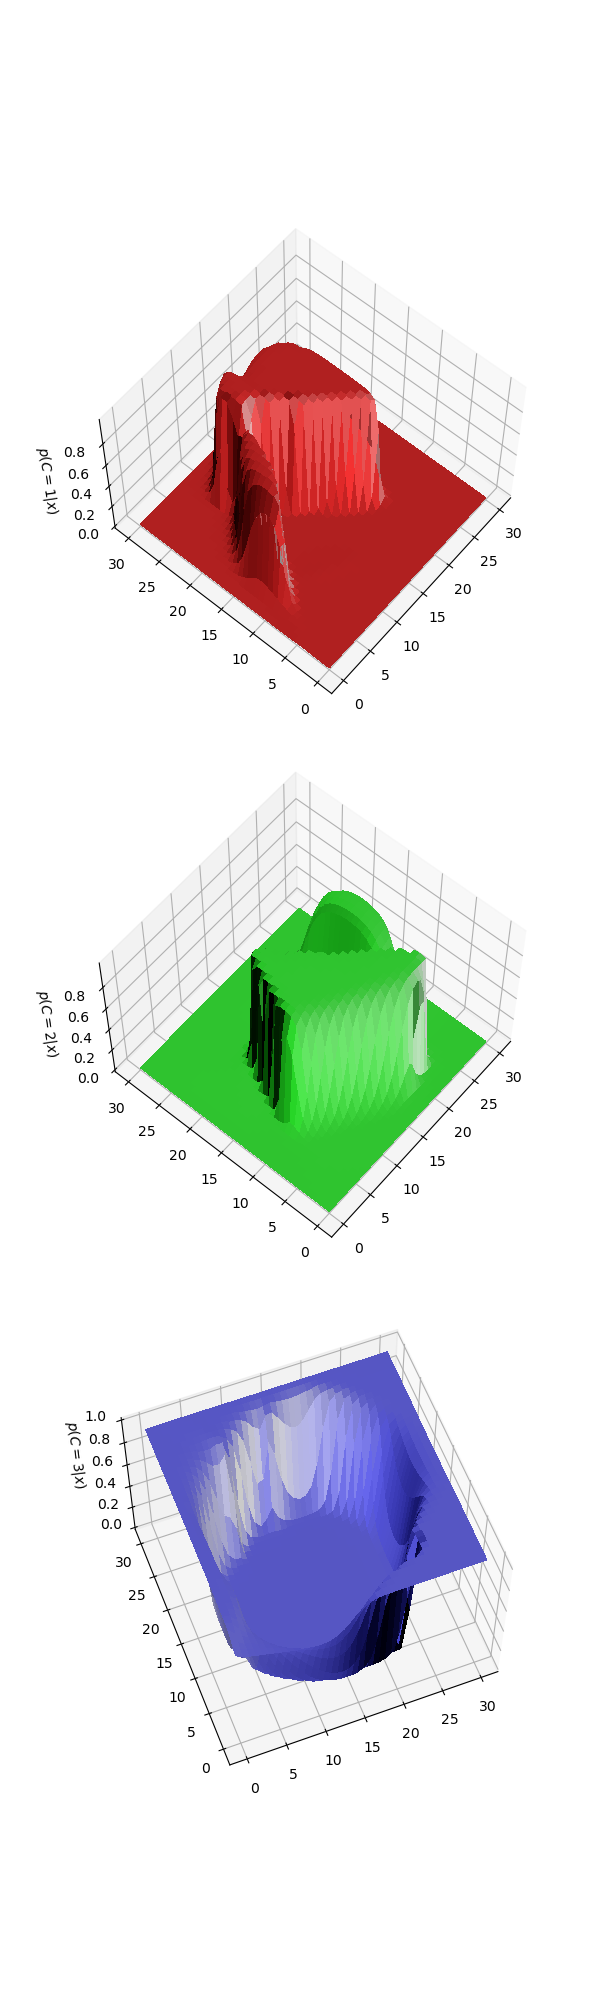

In [48]:
fig = plt.figure(figsize=(6, 20))
ls = LightSource(azdeg=30,  altdeg=10)
white = np.ones((x.shape[0],  x.shape[1],  3))
red = white * np.array([1, 0.2, 0.2])
green = white * np.array([0.2, 1, 0.2])
blue = white * np.array([0.4, 0.4, 1])
colors = [red,  green,  blue]

for c in range(3):
    ax = fig.add_subplot(3, 1, c+1, projection='3d')
    ax.view_init(azim = 180+40, elev = 60)
    Z = probs[:,  c].reshape(x.shape)
    rgb = ls.shade_rgb(colors[c],  Z,  vert_exag=0.1)
    ax.plot_surface(x, y, Z, 
                    rstride=1, cstride=1, linewidth=0,  antialiased=False, 
                    shade=True,  facecolors=rgb)
    ax.set_zlabel(r"$p(C="+str(c+1)+"|x)$")

How would you plot the outputs of the hidden units?

## Accelerometer Data

Let's try to determine what a child is doing based on data from a write accelerometer. Download [accelerometers.npy](https://www.cs.colostate.edu/~anderson/cs545/notebooks/accelerometers.npy).

In [51]:
data = np.load('accelerometers.npy')

In [52]:
data.shape

(225006, 4)

In [53]:
data[0, :]

array([ 1.        , -0.87313405, -0.08552787, -0.29504612])

In [54]:
X = data[:, 1:]
T = data[:, 0:1]
X.shape,  T.shape

((225006, 3), (225006, 1))

In [55]:
def generate_k_fold_cross_validation_sets(X, T, n_folds, shuffle=True):

    if shuffle:
        # Randomly order X and T
        randorder = np.arange(X.shape[0])
        np.random.shuffle(randorder)
        X = X[randorder, :]
        T = T[randorder, :]

    # Partition X and T into folds
    n_samples = X.shape[0]
    n_per_fold = round(n_samples / n_folds)
    n_last_fold = n_samples - n_per_fold * (n_folds - 1)

    folds = []
    start = 0
    for foldi in range(n_folds-1):
        folds.append( (X[start:start + n_per_fold, :], T[start:start + n_per_fold, :]) )
        start += n_per_fold
    folds.append( (X[start:, :], T[start:, :]) )

    # Yield k(k-1) assignments of Xtrain, Train, Xvalidate, Tvalidate, Xtest, Ttest

    for validation_i in range(n_folds):
        for test_i in range(n_folds):
            if test_i == validation_i:
                continue

            train_i = np.setdiff1d(range(n_folds), [validation_i, test_i])

            Xvalidate, Tvalidate = folds[validation_i]
            Xtest, Ttest = folds[test_i]
            if len(train_i) > 1:
                Xtrain = np.vstack([folds[i][0] for i in train_i])
                Ttrain = np.vstack([folds[i][1] for i in train_i])
            else:
                Xtrain, Ttrain = folds[train_i[0]]

            yield Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest


In [56]:
X.shape

(225006, 3)

In [57]:
def times2():
    for i in range(10):
        yield i * 2

In [58]:
list(times2())

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [59]:
z = times2()
z

<generator object times2 at 0x7f984421f970>

In [60]:
next(z)

0

In [61]:
next(z)

2

In [62]:
Xtrain,  Ttrain,  Xval, Tval, Xtest,  Ttest = next(generate_k_fold_cross_validation_sets(X,  T,  n_folds=3))

In [63]:
Xtrain.shape, Ttrain.shape, Xval.shape, Tval.shape, Xtest.shape, Ttest.shape

((75002, 3), (75002, 1), (75002, 3), (75002, 1), (75002, 3), (75002, 1))

In [64]:
np.unique(Ttrain,  return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([7394, 7523, 7593, 7610, 7548, 7454, 7541, 7387, 7492, 7460]))

In [65]:
%precision 5
values, counts = np.unique(Ttrain,  return_counts=True)
counts / Ttrain.shape[0]

array([0.09858, 0.1003 , 0.10124, 0.10146, 0.10064, 0.09938, 0.10054,
       0.09849, 0.09989, 0.09946])

In [66]:
values, counts = np.unique(Tval,  return_counts=True)
counts / Tval.shape[0]

array([0.10204, 0.10084, 0.09866, 0.0988 , 0.09953, 0.10052, 0.10074,
       0.09849, 0.10006, 0.10032])

In [67]:
values, counts = np.unique(Ttest,  return_counts=True)
counts / Ttest.shape[0]

array([0.0994 , 0.09885, 0.10009, 0.09973, 0.09982, 0.10012, 0.0987 ,
       0.10301, 0.10006, 0.10021])

In [ ]:
n_classes = len(np.unique(T))
nnet = nn.NeuralNetworkClassifier(X.shape[1], [10],  n_classes) 
nnet.train(Xtrain, Ttrain, n_epochs=1000, learning_rate=0.1, method='adam')

<IPython.core.display.Javascript object>


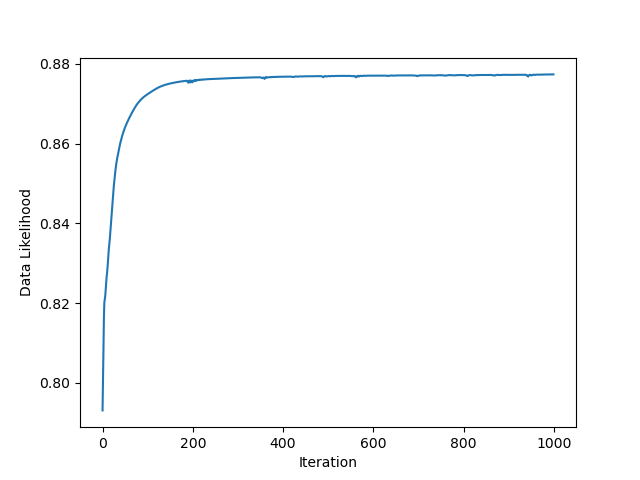

In [73]:
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

Make a confusion matrix.

In [74]:
Classes, Probs = nnet.use(Xtrain)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
table

[['96.3', '0.1', '1.4', '0.0', '2.1', '0.0', '0.0', '0.0', '0.1', '0.0'],
 ['7.1', '73.3', '11.7', '0.1', '3.3', '0.0', '0.1', '2.2', '1.4', '0.6'],
 ['1.6', '4.7', '74.7', '1.3', '5.4', '2.4', '2.8', '1.9', '1.0', '4.1'],
 ['1.5', '8.7', '28.6', '3.5', '16.8', '11.0', '5.6', '3.2', '6.9', '14.2'],
 ['2.0', '8.5', '13.9', '2.9', '40.7', '1.8', '1.8', '8.5', '15.0', '4.8'],
 ['0.0', '0.4', '0.4', '0.0', '0.2', '74.1', '19.8', '0.6', '0.3', '4.2'],
 ['0.0', '1.2', '0.5', '0.1', '0.0', '31.9', '55.2', '1.2', '0.2', '9.7'],
 ['0.2', '3.3', '8.0', '1.2', '8.1', '2.4', '3.3', '25.5', '41.7', '6.4'],
 ['0.1', '2.5', '6.4', '0.8', '8.5', '2.9', '1.8', '18.9', '54.0', '4.0'],
 ['0.0', '7.1', '16.0', '2.8', '3.5', '16.1', '18.6', '5.0', '4.7', '26.2']]

In [75]:
class_names = ('1-Rest', '2-Coloring', '3-Legos', '4-Wii Tennis', '5-Wii Boxing', '6-0.75m/s',
               '7-1.25m/s', '8-1.75m/s', '9-2.25m/s', '10-Stairs')
class_names

('1-Rest',
 '2-Coloring',
 '3-Legos',
 '4-Wii Tennis',
 '5-Wii Boxing',
 '6-0.75m/s',
 '7-1.25m/s',
 '8-1.75m/s',
 '9-2.25m/s',
 '10-Stairs')

In [76]:
import pandas
conf = pandas.DataFrame(table, index=class_names, columns=class_names)
conf

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.3,0.1,1.4,0.0,2.1,0.0,0.0,0.0,0.1,0.0
2-Coloring,7.1,73.3,11.7,0.1,3.3,0.0,0.1,2.2,1.4,0.6
3-Legos,1.6,4.7,74.7,1.3,5.4,2.4,2.8,1.9,1.0,4.1
4-Wii Tennis,1.5,8.7,28.6,3.5,16.8,11.0,5.6,3.2,6.9,14.2
5-Wii Boxing,2.0,8.5,13.9,2.9,40.7,1.8,1.8,8.5,15.0,4.8
6-0.75m/s,0.0,0.4,0.4,0.0,0.2,74.1,19.8,0.6,0.3,4.2
7-1.25m/s,0.0,1.2,0.5,0.1,0.0,31.9,55.2,1.2,0.2,9.7
8-1.75m/s,0.2,3.3,8.0,1.2,8.1,2.4,3.3,25.5,41.7,6.4
9-2.25m/s,0.1,2.5,6.4,0.8,8.5,2.9,1.8,18.9,54.0,4.0
10-Stairs,0.0,7.1,16.0,2.8,3.5,16.1,18.6,5.0,4.7,26.2


SCG: Epoch 10 ObjectiveF=0.80834
SCG: Epoch 20 ObjectiveF=0.83782
SCG: Epoch 30 ObjectiveF=0.85372
SCG: Epoch 40 ObjectiveF=0.86543
SCG: Epoch 50 ObjectiveF=0.87303
SCG: Epoch 60 ObjectiveF=0.87703
SCG: Epoch 70 ObjectiveF=0.88041
SCG: Epoch 80 ObjectiveF=0.88265
SCG: Epoch 90 ObjectiveF=0.88414
SCG: Epoch 100 ObjectiveF=0.88549


<IPython.core.display.Javascript object>


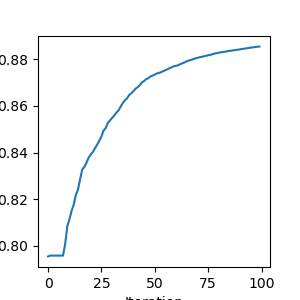

In [78]:
nnet = nn.NeuralNetworkClassifier(X.shape[1], [100, 50],  n_classes) 
nnet.train(Xtrain, Ttrain, n_epochs=100, learning_rate=0.1, method='scg')

plt.figure(figsize=(3, 3))
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

In [82]:
print('Training Data')

Classes, Probs = nnet.use(Xtrain)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
conf = pandas.DataFrame(table, index=class_names, columns=class_names)
conf

Training Data


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.4,0.2,1.4,0.6,1.3,0.0,0.0,0.1,0.1,0.0
2-Coloring,10.9,71.9,8.5,2.5,3.2,0.0,0.1,2.0,0.5,0.5
3-Legos,1.3,5.0,70.9,4.1,6.0,2.2,1.8,3.4,0.2,5.2
4-Wii Tennis,1.7,6.1,23.8,14.3,12.8,9.8,5.7,6.8,3.9,15.0
5-Wii Boxing,1.8,6.4,10.7,5.6,49.5,0.8,1.3,8.7,11.3,3.9
6-0.75m/s,0.0,0.1,0.5,0.1,0.3,72.7,21.3,0.7,0.1,4.1
7-1.25m/s,0.0,0.3,0.5,0.3,0.1,28.2,59.6,1.3,0.2,9.5
8-1.75m/s,0.1,2.2,5.8,3.0,10.3,1.3,3.4,33.0,33.8,7.2
9-2.25m/s,0.1,1.3,4.8,2.9,10.5,1.3,2.4,22.9,49.9,4.2
10-Stairs,0.0,4.9,12.8,5.7,4.7,14.6,18.5,7.1,3.5,28.3


In [84]:
print('Validation Data')

Classes, Probs = nnet.use(Xval)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(f'{100 * np.mean(Classes[Tval == true_class] == predicted_class):0.1f}')
    table.append(row)
conf = pandas.DataFrame(table, index=class_names, columns=class_names)
conf

Validation Data


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.4,0.2,1.4,0.4,1.4,0.0,0.0,0.1,0.1,0.0
2-Coloring,11.0,72.1,8.2,2.5,3.1,0.0,0.0,2.2,0.4,0.5
3-Legos,1.1,5.3,70.4,4.1,6.2,2.1,2.0,3.2,0.2,5.3
4-Wii Tennis,1.5,5.7,24.9,14.5,12.3,10.0,5.4,7.8,3.8,14.0
5-Wii Boxing,2.0,6.0,11.2,5.9,48.6,0.9,1.4,8.6,11.6,3.9
6-0.75m/s,0.0,0.2,0.3,0.1,0.1,72.1,21.7,0.9,0.1,4.5
7-1.25m/s,0.0,0.4,0.6,0.1,0.2,28.7,59.5,1.1,0.2,9.4
8-1.75m/s,0.2,2.3,6.1,2.8,10.3,1.2,3.7,32.4,34.1,6.9
9-2.25m/s,0.1,1.8,4.7,2.8,11.0,0.9,2.6,23.0,49.0,4.2
10-Stairs,0.1,5.0,13.1,5.4,4.6,14.7,17.6,7.1,3.5,29.0


In [85]:
print('Testing Data')

Classes, Probs = nnet.use(Xtest)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(f'{100 * np.mean(Classes[Ttest == true_class] == predicted_class):0.1f}')
    table.append(row)
conf = pandas.DataFrame(table, index=class_names, columns=class_names)
conf

Testing Data


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.3,0.4,1.4,0.5,1.1,0.0,0.0,0.1,0.2,0.0
2-Coloring,10.8,71.6,8.5,2.3,3.4,0.0,0.0,2.3,0.3,0.7
3-Legos,1.3,5.0,71.5,4.0,5.6,2.4,1.7,3.0,0.2,5.4
4-Wii Tennis,1.4,5.6,23.1,15.6,12.8,10.0,6.1,7.0,4.5,14.0
5-Wii Boxing,1.8,6.6,11.2,5.5,48.5,1.0,1.5,8.8,11.4,3.8
6-0.75m/s,0.0,0.1,0.5,0.1,0.2,72.1,21.7,0.8,0.2,4.3
7-1.25m/s,0.0,0.3,0.5,0.3,0.2,28.7,59.7,1.0,0.3,9.0
8-1.75m/s,0.2,2.0,6.3,2.9,10.0,1.5,3.6,33.8,33.4,6.3
9-2.25m/s,0.1,1.9,4.9,2.1,9.9,1.2,2.3,23.3,50.4,4.2
10-Stairs,0.0,4.7,13.0,5.4,4.1,14.6,18.0,7.2,3.6,29.4


In [86]:
import scipy.signal as sig

def cwt(eeg, Fs, freqs, width, channelNames=None, graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None, None
    nChannels, nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = ['Channel {:2d}'.format(i) for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels,  nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel', ch, ' freq ', end='')
        for freqi in range(nFreqs):
            print(freqs[freqi], ' ', end='')
            mag, phase = energyvec(freqs[freqi], eeg[ch, :], Fs, width)
            tfrepPhase[ch, freqi, :] = phase
            tfrep[ch, freqi, :] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs, f, width):
  ''' len = morletLength(Fs, f, width) '''
  dt = 1.0/Fs
  sf = f/width
  st = 1.0/(2*np.pi*sf)
  return int((3.5*st - -3.5*st)/dt)

def energyvec(f, s, Fs, width):
  '''
  function [y, phase] <- energyvec(f, s, Fs, width)
  function y <- energyvec(f, s, Fs, width)

  Return a vector containing the energy as a
  function of time for frequency f. The energy
  is calculated using Morlet''s wavelets.
  s : signal
  Fs: sampling frequency
  width : width of Morlet wavelet (><- 5 suggested).
  '''

  dt = 1.0/Fs
  sf = f/float(width)
  st = 1.0/(2*np.pi*sf)

  t = np.arange(-3.5*st, 3.5*st, step=dt)
  m = morlet(f, t, width)
  # yconv = np.convolve(s, m, mode="same")
  yconv = sig.fftconvolve(s, m, mode='same')

  lengthMorlet = len(m)
  firsthalf = int(lengthMorlet/2.0 + 0.5)
  secondhalf = lengthMorlet - firsthalf

  padtotal = len(s) - len(yconv)
  padfront = int(padtotal/2.0 + 0.5)
  padback = padtotal - padfront
  yconvNoBoundary = yconv
  y = np.abs(yconvNoBoundary)**2
  phase = np.angle(yconvNoBoundary, deg=True)
  return y, phase

######################################################################
      
def morlet(f, t, width):
    '''
    function y <- morlet(f, t, width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    '''
    sf = f/float(width)
    st = 1.0/(2*np.pi*sf)
    A = 1.0/np.sqrt(st*np.sqrt(2*np.pi))
    y = A*np.exp(-t**2/(2*st**2)) * np.exp(1j*2*np.pi*f*t)
    return y

In [87]:
import time
width = 75 
maxFreq = 20
freqs = np.arange(0.5, maxFreq, 0.5) # makes same freqs used in stft above
start = time.time()
tfrep, tfrepPhase = cwt(data[:, 1:].T,  75,  freqs,  width)
print('CWT time: {} seconds'.format(time.time() - start))

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 2.3516740798950195 seconds


<IPython.core.display.Javascript object>


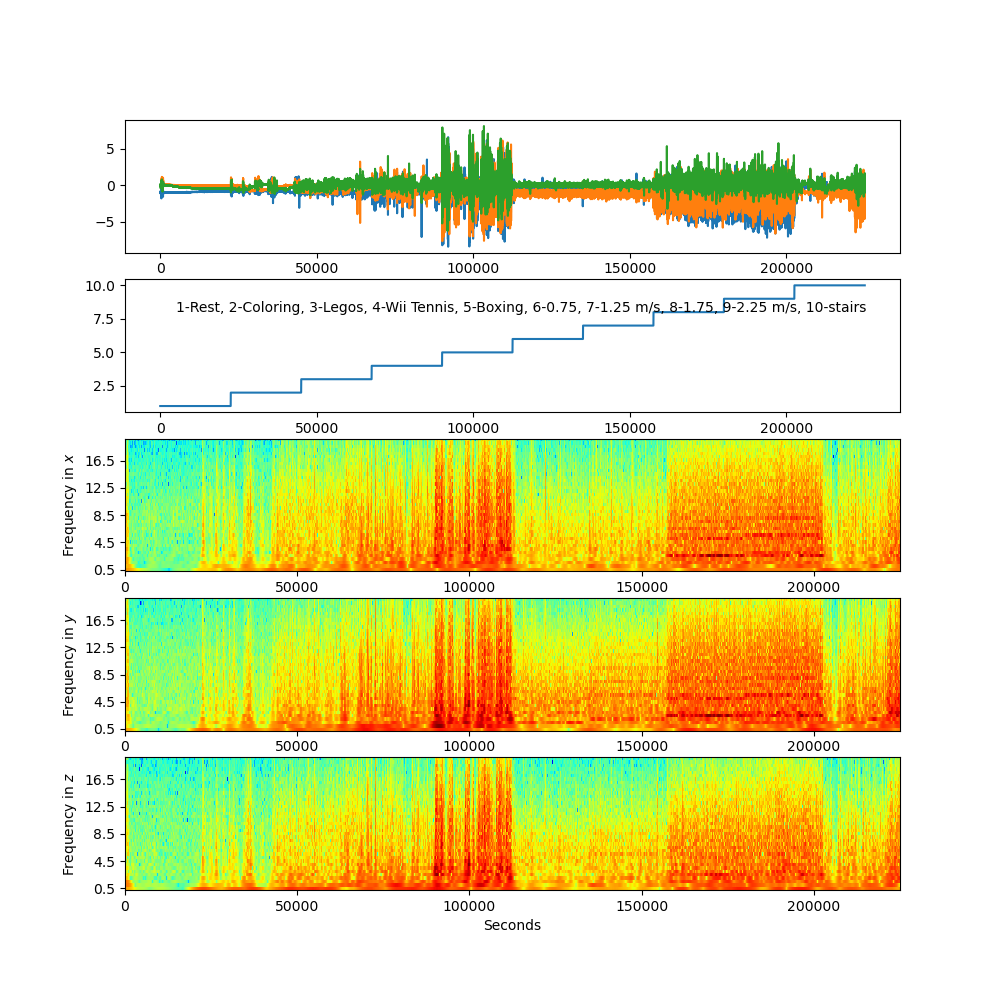

In [88]:
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(data[:, 1:])
plt.axis('tight')

plt.subplot(5, 1, 2)
plt.plot(data[:, 0])
plt.text(5000, 8, '1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5, 1, i+3)
    plt.imshow(np.log(tfrep[i, :, :]), 
               interpolation='nearest', origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$', '$y$', '$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

In [89]:
tfrep.shape

(3, 39, 225006)

In [90]:
X = tfrep.reshape((3*39, -1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [91]:
Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = next(generate_k_fold_cross_validation_sets(X, T, 3))

In [92]:
print(Xtrain.shape)
nnet = nn.NeuralNetworkClassifier(X.shape[1], [10], 10)  #10 classes 
nnet.train(Xtrain, Ttrain, n_epochs = 500, learning_rate=0.1, method='adam')

(75002, 117)
Adam: Epoch 50 ObjectiveF=0.94656
Adam: Epoch 100 ObjectiveF=0.97067
Adam: Epoch 150 ObjectiveF=0.97494
Adam: Epoch 200 ObjectiveF=0.98224
Adam: Epoch 250 ObjectiveF=0.90947
Adam: Epoch 300 ObjectiveF=0.97745
Adam: Epoch 350 ObjectiveF=0.98169
Adam: Epoch 400 ObjectiveF=0.98391
Adam: Epoch 450 ObjectiveF=0.98555
Adam: Epoch 500 ObjectiveF=0.96271


NeuralNetwork(117, [10], 10)

In [94]:
print('Test Data')

Classes, Probs = nnet.use(Xtest)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(f'{100 * np.mean(Classes[Ttest == true_class] == predicted_class):0.1f}')
    table.append(row)
conf = pandas.DataFrame(table, index=class_names, columns=class_names)
conf

Test Data


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,90.8,6.4,0.6,0.0,0.0,2.1,0.0,0.0,0.0,0.0
2-Coloring,28.2,42.3,11.5,0.0,0.0,4.4,0.0,0.0,0.0,13.6
3-Legos,0.2,6.3,76.3,1.9,0.0,0.2,0.0,0.0,0.0,15.0
4-Wii Tennis,0.0,0.0,0.0,98.0,0.9,0.0,0.0,0.0,0.0,1.2
5-Wii Boxing,0.0,0.0,0.0,1.2,98.2,0.0,0.0,0.0,0.3,0.3
6-0.75m/s,0.2,0.0,0.0,0.0,0.1,95.3,0.9,0.0,0.0,3.5
7-1.25m/s,0.0,0.0,0.0,0.0,0.0,33.8,61.7,0.2,0.0,4.4
8-1.75m/s,0.0,0.0,0.0,0.0,0.5,0.0,0.1,99.3,0.0,0.0
9-2.25m/s,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.1,99.4,0.0
10-Stairs,0.0,0.0,0.0,0.0,0.0,17.7,0.0,0.0,0.0,82.3


In [95]:
np.mean(Classes == Ttest) * 100

84.39641609557079